# 타이타닉 사고에서 특정 조건으로 생존 여부를 예측하는 프로젝트
## logistic regression을 이용해보자

#### 라이브러리
pandas  
numpy  
matplotlib.pyplot  
seaborn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 데이터 불러오기

Titanic - Machine Learning from Disaster 

In [2]:
df = pd.read_csv('data/train.csv')

#### 데이터 전처리

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 사용할 조건들을 선택하자
##### -output
Survived  


##### -input 
Pclass 사회경제적 지위(1에 가까울수록 높음)  
Sex 성별  
Age 나이  

In [4]:
df = df.drop(labels=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
df

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


#### 나이가 없는 데이터들은 그냥 삭제하도록 하자

In [6]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


#### 데이터 처리를 위해 Sex의 자료형을 바꿔주자
#### 남성 0
#### 여성 1


In [7]:
df = df.replace('male', 0).replace('female', 1)
df

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0
...,...,...,...,...
885,0,3,1,39.0
886,0,2,0,27.0
887,1,1,1,19.0
889,1,1,0,26.0


#### 시각화

전체 생존  
성별 생존  
사회경제적 지위별 생존

#### 전체 생존

In [19]:
df['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

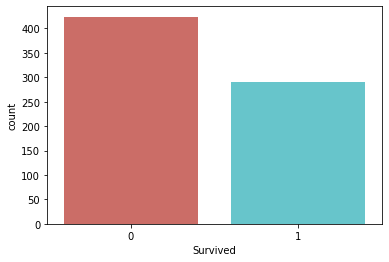

In [18]:
sns.countplot(x='Survived', data=df, palette='hls')
plt.show()
# 0: 사망, 1: 생존

#### 성별 생존

In [30]:
tmp_df = df[df['Survived'] == 1]
tmp_df['Sex'].value_counts()

1    197
0     93
Name: Sex, dtype: int64

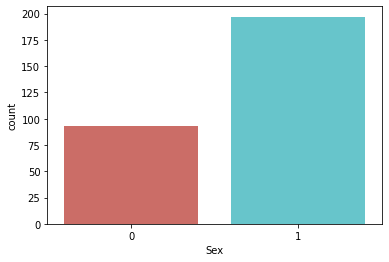

In [32]:
sns.countplot(x='Sex', data=tmp_df, palette='hls')
plt.show()
# 0: 남성, 1: 여성

#### 사회경제적 지위별 생존

In [34]:
df['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [33]:
tmp_df = df[df['Survived'] == 1]
tmp_df['Pclass'].value_counts()

1    122
3     85
2     83
Name: Pclass, dtype: int64

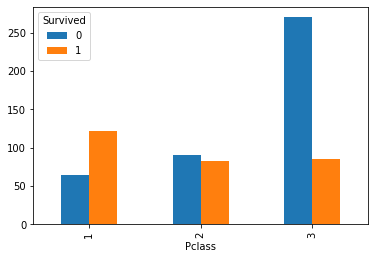

In [36]:
pd.crosstab(df.Pclass, df.Survived).plot(kind='bar')
plt.show()
# 사회경제적 지위별 생존비율
# 0: 사망, 1: 생존

#### 데이터 분석

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Pclass', 'Sex', 'Age']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### 데이터 성능 평가

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

0.7972027972027972

#### 약 80% 정도의 정확도가 측정되었다.

### 80%로 생각보다 높은 정확도를 보였지만 이산형 출력값을 가지는 로지스틱 회귀분석의 특성을 생각해보았을때 완전히 마음에 들진않았다.
### 현재 각 범주들은 가중치를 가지고 있지않은데, 각 범주들에게 가중치를 주고 분석을 진행한다면 개선할 수 있을것같다.